# **Car Evaluation Data Analysis**

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading dataset
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv("car.csv", header=None, names=col_names)

#Displaying First 15 instance of data
df.head(15)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


# **Exploratory Data Analysis**

In [2]:
# Get a summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [3]:
#Column List
list(df.columns)

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [4]:
for i in df.columns:
  print(df[i].value_counts())
  print()

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

persons
2       576
4       576
more    576
Name: count, dtype: int64

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

safety
low     576
med     576
high    576
Name: count, dtype: int64

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64



In [5]:
#describing the dataset 
df.describe()


,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [6]:
#Check for missing values
df.isnull().sum()


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
df.dtypes


buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [8]:
# Get a count of the number of unique values for each feature column in the DataFrame.
feature_names = list(df.columns.values[:-1])
for feature in feature_names:
    unique_count = df[feature].nunique()
    unique_vals = df[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

buying: 4 values, ['vhigh' 'high' 'med' 'low']
maint: 4 values, ['vhigh' 'high' 'med' 'low']
doors: 4 values, ['2' '3' '4' '5more']
persons: 3 values, ['2' '4' 'more']
lug_boot: 3 values, ['small' 'med' 'big']
safety: 3 values, ['low' 'med' 'high']


In [9]:
# Get a count of the number of unique values for the label column.
label_name = df.columns.values[-1]
print("{}: {} values, {}".format(label_name, df[label_name].nunique(), df[label_name].unique()))


class: 4 values, ['unacc' 'acc' 'vgood' 'good']


In [10]:
#value count of buying class
df['buying'].value_counts()

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

In [11]:
df[label_name].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

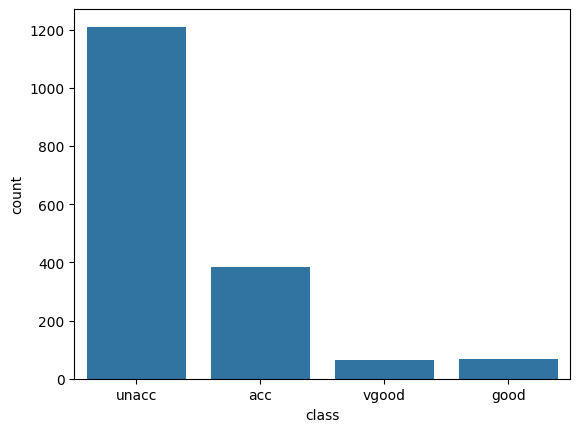

In [12]:
#graph plot of label data
sns.countplot(x = df['class'])

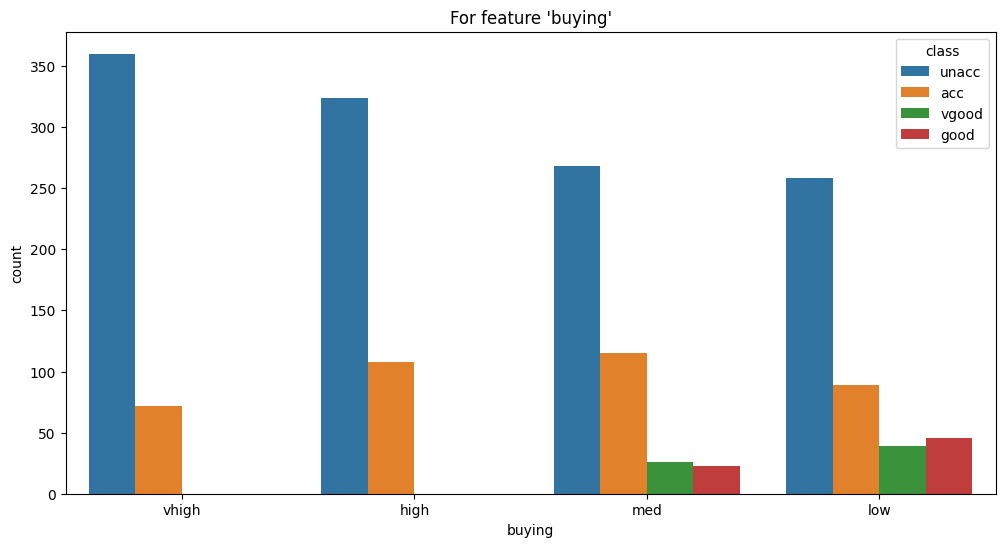

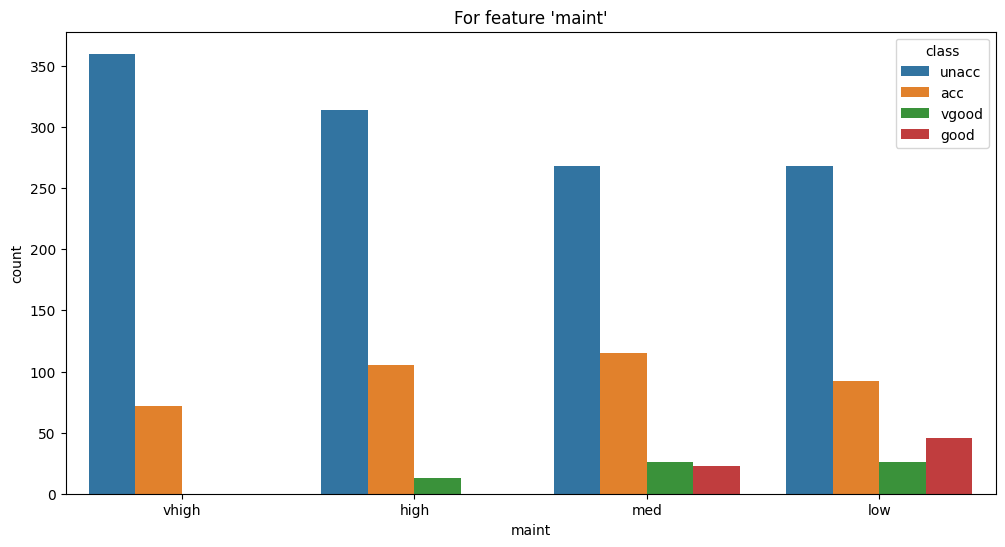

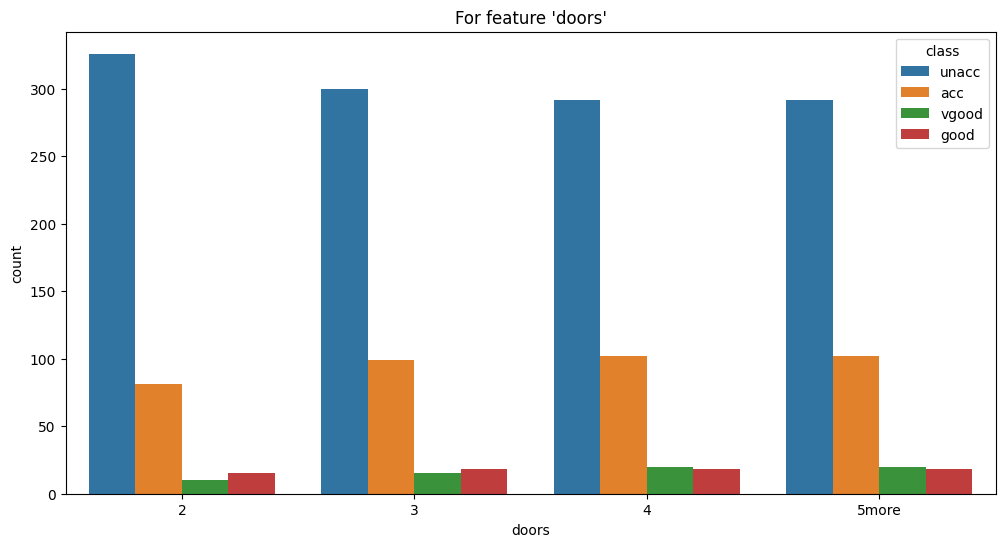

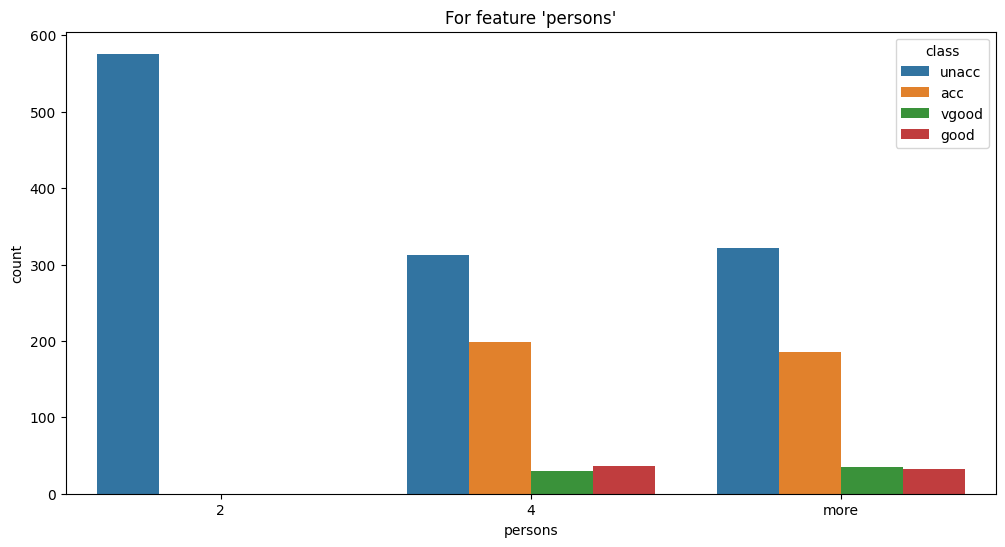

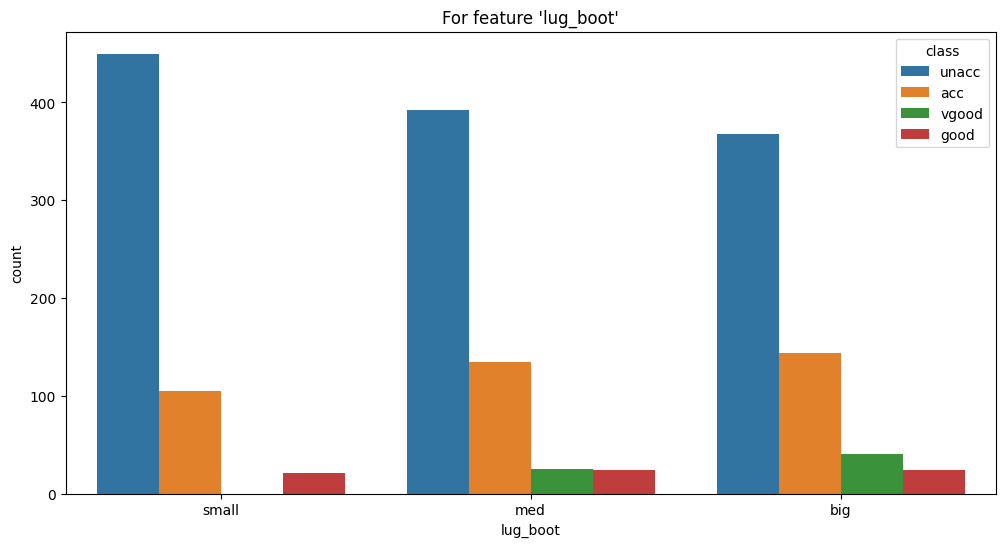

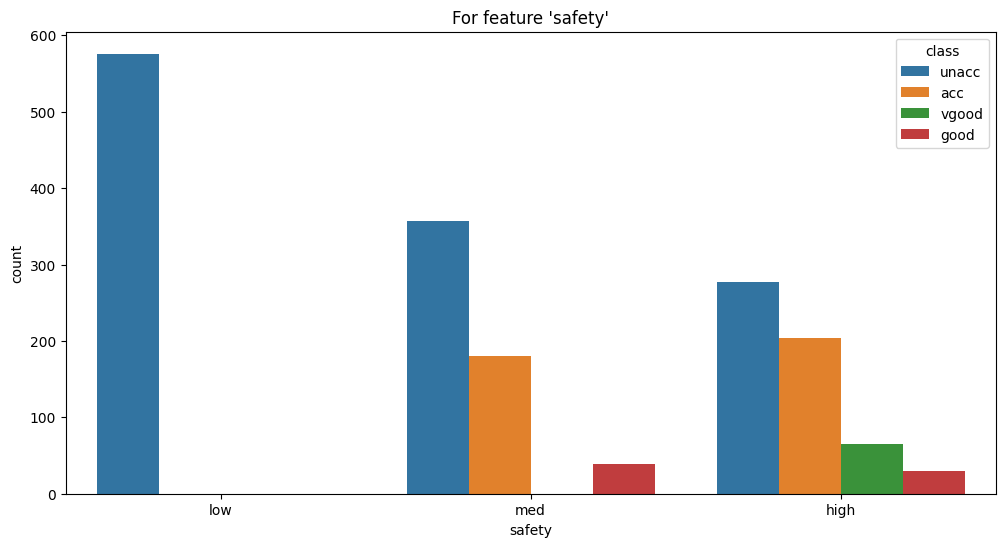

In [13]:
#graph plot of feature data
for i in df.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(x = df[i],hue=df['class'])

In [14]:
#data distributed in each of the class
count_unacc = len(df[df['class']=='unacc'])
count_acc = len(df[df['class']=='acc'])
count_vgood = len(df[df['class']=='vgood'])
count_good = len(df[df['class']=='good'])
pct_of_unacc = count_unacc/(count_unacc+count_acc+count_good+count_vgood)
print("percentage of unacceptable car is", pct_of_unacc*100)
pct_of_acc = count_acc/(count_unacc+count_acc+count_good+count_vgood)
print("percentage of acceptable car is", pct_of_acc*100)
pct_of_good = count_good/(count_unacc+count_acc+count_good+count_vgood)
print("percentage of good car is", pct_of_good*100)
pct_of_vgood = count_vgood/(count_unacc+count_acc+count_good+count_vgood)
print("percentage of very good car is", pct_of_vgood*100)

percentage of unacceptable car is 70.02314814814815
percentage of acceptable car is 22.22222222222222
percentage of good car is 3.9930555555555554
percentage of very good car is 3.761574074074074


# **Encoding Categorical Data**

In [15]:
#Transforming string categories to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.columns = ['Buying','Maintenance','Doors','Persons','Lug_Boot','Safety','class']
df['Buying'] = df['Buying'].map({'vhigh':3,'high':2,'med':1,'low':0})
df['Maintenance'] = df['Maintenance'].map({'vhigh':3,'high':2,'med':1,'low':0})
df['Lug_Boot'] = df['Lug_Boot'].map({'big':2,'med':1,'small':0})
df['Safety'] = df['Safety'].map({'high':2,'med':1,'low':0})
df['class'] = df['class'].map({'unacc':0,'acc':1,'good':2, 'vgood':3})
df['Doors'] = df['Doors'].map({'2':2, '3':3, '4':4, '5more':5})
df['Persons'] = df['Persons'].map({'2':2, '4':4, 'more':5})

df

,Buying,Maintenance,Doors,Persons,Lug_Boot,Safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2


<Axes: >

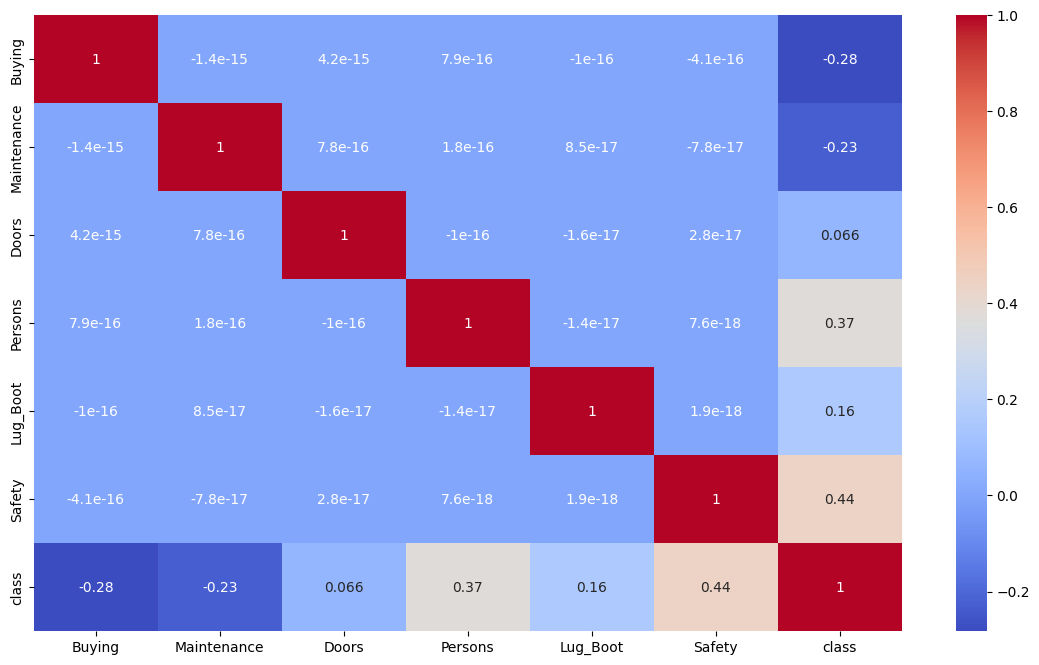

In [16]:
#Heat map of data
corr = df.corr()
plt.figure(figsize = (14,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [17]:
# Create dummy columns for the categorical features. The drop_first parameter takes care of the k-1 explained above.
df_encoded = df # columns=feature_names, drop_first=True


df_encoded.tail()

,Buying,Maintenance,Doors,Persons,Lug_Boot,Safety,class
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2
1727,0,0,5,5,2,2,3


In [18]:
print(df_encoded.columns)


Index(['Buying', 'Maintenance', 'Doors', 'Persons', 'Lug_Boot', 'Safety',
       'class'],
      dtype='object')


In [19]:
# Encode the class column. The class column contains the labels.
# class_uniques will be used later to map the predicted classes back into the original labels for easier interpretation. 
df_encoded['class'], class_uniques = pd.factorize(df_encoded['class'])
df_encoded.tail()

,Buying,Maintenance,Doors,Persons,Lug_Boot,Safety,class
1723,0,0,5,5,1,1,3
1724,0,0,5,5,1,2,2
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,3
1727,0,0,5,5,2,2,2


In [20]:
#Splitting dataset into independent variable `X` and dependent variable `y`
X = df_encoded.iloc[:,:-1].values
y = df_encoded.iloc[:,-1].values


# **Splitting the dataset into the training set and testing set**

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into a training and test set with a 75%:25% split.
# The setting of the random state parameter allows for reproducability (i.e the split will always yield the same results).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
#Printing split of dataset in percentage
percentage_training = len(X_train) / len(X) * 100
percentage_testing = len(X_test) / len(X) * 100

print(f"Percentage of Training Data: {percentage_training}%")
print(f"Percentage of Testing Data: {percentage_testing}%")

Percentage of Training Data: 75.0%
Percentage of Testing Data: 25.0%


In [23]:
# Print the number of data points in each set
print(f"Number of data points in the X_training set: {len(X_train)}")
print(f"Number of data points in the X_testing set: {len(X_test)}")
print(f"Number of data points in the y_training set: {len(y_train)}")
print(f"Number of data points in the y_testing set: {len(y_test)}")

Number of data points in the X_training set: 1296
Number of data points in the X_testing set: 432
Number of data points in the y_training set: 1296
Number of data points in the y_testing set: 432


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **1. Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier using 2 decision trees.
clf = RandomForestClassifier(n_estimators=2, random_state=42)
# Train the classifier. This is where tiihe forest of decision trees are created.
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=42)

In [26]:
# Predict the test set results.
y_pred = clf.predict(X_test)
# Show first five predictions.
y_pred[0:5]

array([0, 2, 0, 1, 0], dtype=int64)

In [27]:
class_uniques

Index([0, 1, 3, 2], dtype='int64')

In [28]:
# Mapping back to original class names.
y_pred_labelled = class_uniques[y_pred]
# Show first five predictions.
y_pred_labelled[0:5]

Index([0, 3, 0, 1, 0], dtype='int64')

In [29]:
# Predicted probabilities of the first five predictions.
clf.predict_proba(X_test)[0:5]

array([[1. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0.5],
       [1. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. ],
       [1. , 0. , 0. , 0. ]])

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_test and y_pred are defined elsewhere in your code
acc = accuracy_score(y_test, y_pred)

# Calculate accuracy in percentage
acc_percentage = acc * 100

# Print the accuracy score and percentage
print(f'Accuracy Score of the Model: {acc}')
print(f'Accuracy Percentage: {acc_percentage}%')


Accuracy Score of the Model: 0.9050925925925926
Accuracy Percentage: 90.50925925925925%


Text(0, 0.5, 'Accuracy')

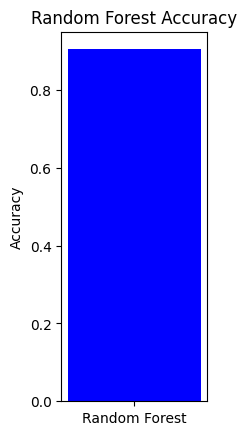

In [31]:
# Plot accuracy 
plt.subplot(1, 3, 2)
plt.bar(['Random Forest'], [acc], color=['blue'])
plt.title('Random Forest Accuracy')
plt.ylabel('Accuracy')

In [32]:
from sklearn.metrics import confusion_matrix

# Restore the class labels from encoded values back to their original strings.
y_pred = class_uniques[y_pred]
y_test = class_uniques[y_test]
# Create the confusion matrix. Setting the labels parameter sets the order of the columns and rows in the matrix.
# First row/column shows unacceptable, second row/column shows acceptable etc.
confusion_matrix(y_test, y_pred)

array([[292,   2,   0,   0],
       [ 20,  77,   3,   3],
       [  0,   3,   9,   3],
       [  0,   7,   0,  13]], dtype=int64)

**Classification Report and Confusion matrix of Random forest**

***Classification Report*** :

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       294
           1       0.87      0.75      0.80       103
           2       0.75      0.60      0.67        15
           3       0.68      0.65      0.67        20

    accuracy                           0.91       432
   macro avg       0.81      0.75      0.77       432
weighted avg       0.90      0.91      0.90       432

***Confusion Matrix :***

[[292   2   0   0]
 [ 20  77   3   3]
 [  0   3   9   3]
 [  0   7   0  13]]


***Heat Map :***



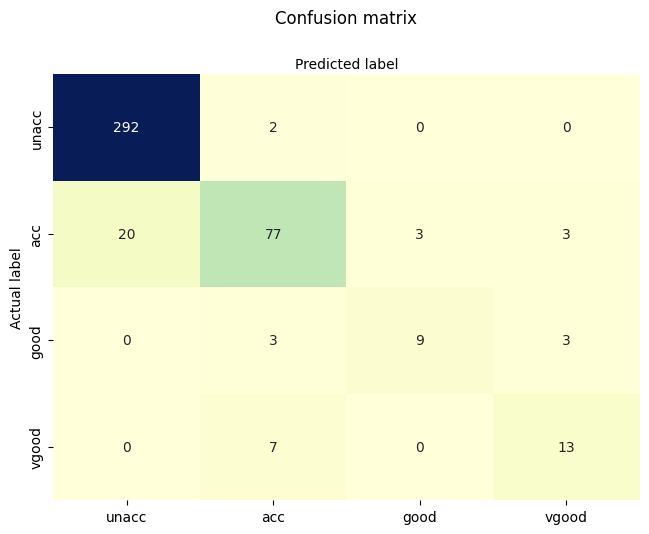

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Display the precision, recall and F1 score for each class.
print('***Classification Report*** :\n')

print(classification_report(y_test, y_pred))

# Print confusion matrix
print('***Confusion Matrix :***\n')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


print('\n')

print('***Heat Map :***\n')

# Plot confusion matrix as a heatmap
labels = ['unacc', 'acc', 'good', 'vgood']
confusion_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Create heatmap
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix_df, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**ROC Curve**

C:\Users\infoa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\multiclass.py:503: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


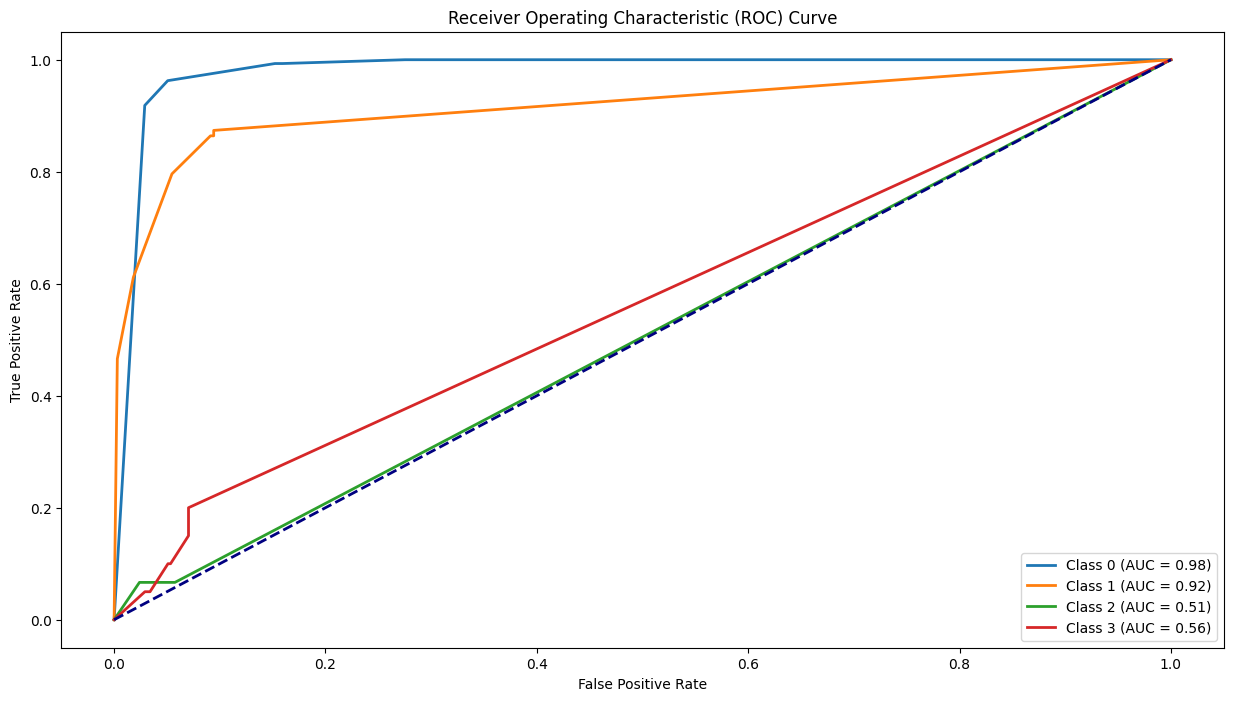

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels
y_bin = label_binarize(y_test, classes=clf.classes_)

# Create the OneVsRestClassifier from the original classifier
classifier = OneVsRestClassifier(clf)

# Get the predicted probabilities for each class
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Replace NaN values with zeros
y_score = np.nan_to_num(y_score, nan=0.0)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(15, 8))
for i in range(len(clf.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# **2. ANN**

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal
import matplotlib.pyplot as plt

# Extract features and labels
X = df.drop('Persons', axis=1).values
y = df['class'].values

# One-hot encode the labels
y = to_categorical(y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the number of folds
n_folds = 4

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize an empty list to store the accuracy scores for each fold
accuracy_scores = []

# Initialize lists to store training and validation accuracies for each epoch
train_accuracies = []
val_accuracies = []

# Define your neural network model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=6, activation='relu', kernel_initializer=he_normal(5), name='dense_1'))
    model.add(Dense(8, activation='relu', kernel_initializer=he_normal(5), name='dense_2'))
    model.add(Dense(4, activation='softmax', kernel_initializer=he_normal(5), name='dense_3'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
    return model

# Iterate through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, np.argmax(y, axis=1)), 1):
    print(f'Fold {fold}')

    # Split the data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, a_y_test = y[train_index], y[test_index]

    # Create and compile the model
    model = create_model()

    # Train the model on the training data and save the training history
    hist = model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=1, validation_data=(X_test, a_y_test))

    # Extract training and validation accuracies from the history
    train_accuracies.append(hist.history['accuracy'])
    val_accuracies.append(hist.history['val_accuracy'])

    # Evaluate the model on the test data
    a_y_pred = np.argmax(model.predict(X_test), axis=1)

    # Calculate accuracy and store it
    accuracy = accuracy_score(np.argmax(a_y_test, axis=1), a_y_pred)
    print(f'Accuracy: {accuracy}')
    accuracy_scores.append(accuracy)

# Calculate and print the mean accuracy across all folds
a_mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Accuracy: {a_mean_accuracy}')




Fold 1

Epoch 1/3


41/41 [==============================] - 2s 11ms/step - loss: 0.7570 - accuracy: 0.6960 - val_loss: 0.3956 - val_accuracy: 0.8472
Epoch 2/3
41/41 [==============================] - 0s 4ms/step - loss: 0.2864 - accuracy: 0.9074 - val_loss: 0.1916 - val_accuracy: 0.9236
Epoch 3/3
14/14 [==============================] - 0s 2ms/step
Accuracy: 0.9236111111111112
Fold 2
Epoch 1/3
41/41 [==============================] - 1s 9ms/step - loss: 0.7547 - accuracy: 0.7106 - val_loss: 0.4205 - val_accuracy: 0.8171
Epoch 2/3
41/41 [==============================] - 0s 4ms/step - loss: 0.2927 - accuracy: 0.8981 - val_loss: 0.2085 - val_accuracy: 0.9236
Epoch 3/3
14/14 [==============================] - 0s 2ms/step
Accuracy: 0.9236111111111112
Fold 3
Epoch 1/3
41/41 [==============================] - 1s 10ms/step - loss: 0.7522 - accuracy: 0.7130 - val_loss: 0.4404 - val_accuracy: 0.8588
Epoch 2/3
41/41 [==============================] - 0s 5ms/step - loss: 0.2924 - accuracy: 0.91

In [36]:
#calculationg accuracy in percentage
a_acc_percentage = a_mean_accuracy * 100
print(f'Accuracy Percentage: {a_acc_percentage}%')


Accuracy Percentage: 92.24537037037037%


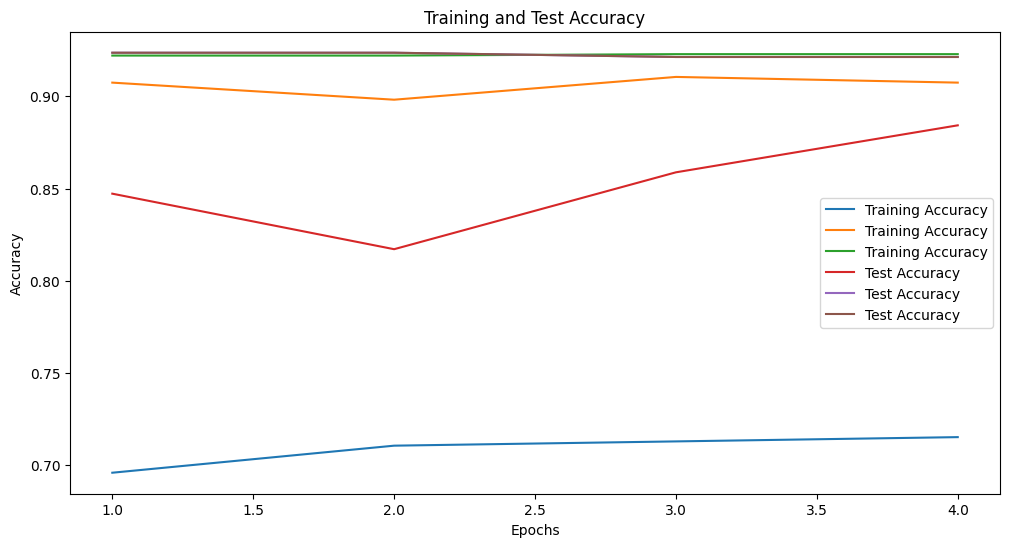

In [37]:
# Plot accuracy curve
plt.figure(figsize=(12, 6))
epochs = range(1, len(train_accuracies) + 1)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Classification Report and Confusion Matrix of ANN**

***Classification Report:***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       0.74      1.00      0.85        96
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        18

    accuracy                           0.92       432
   macro avg       0.43      0.50      0.46       432
weighted avg       0.86      0.92      0.89       432

***Confusion Matrix:***
[[302   0   0   0]
 [  0  96   0   0]
 [  0  16   0   0]
 [  0  18   0   0]]


***Heat Map :***



C:\Users\infoa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\infoa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\infoa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: Unde

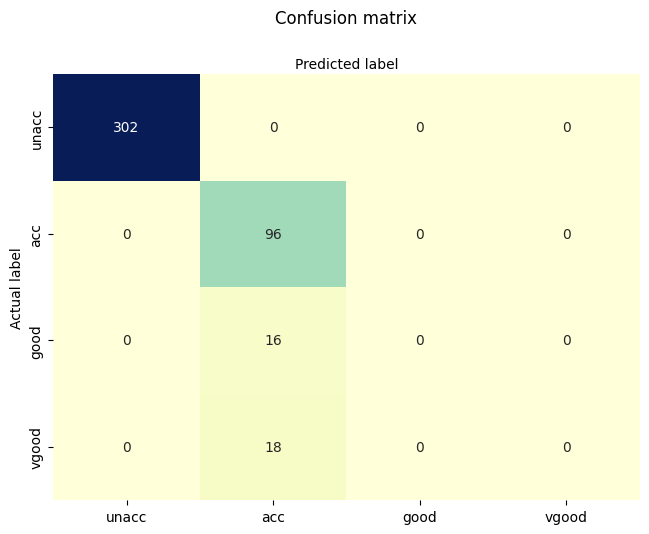

In [38]:
# Initialize lists to store true labels and predicted labels for each fold
true_labels = []
predicted_labels = []    
# Store true and predicted labels for later use
true_labels.extend(np.argmax(a_y_test, axis=1))
predicted_labels.extend(a_y_pred)


# Generate and print classification report
print("***Classification Report:***")
print(classification_report(true_labels, predicted_labels))

# Generate and print confusion matrix
print("***Confusion Matrix:***")
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(conf_matrix)
print('\n')

print('***Heat Map :***\n')

# Plot confusion matrix as a heatmap
labels = ['unacc', 'acc', 'good', 'vgood']
confusion_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Create heatmap
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix_df, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()




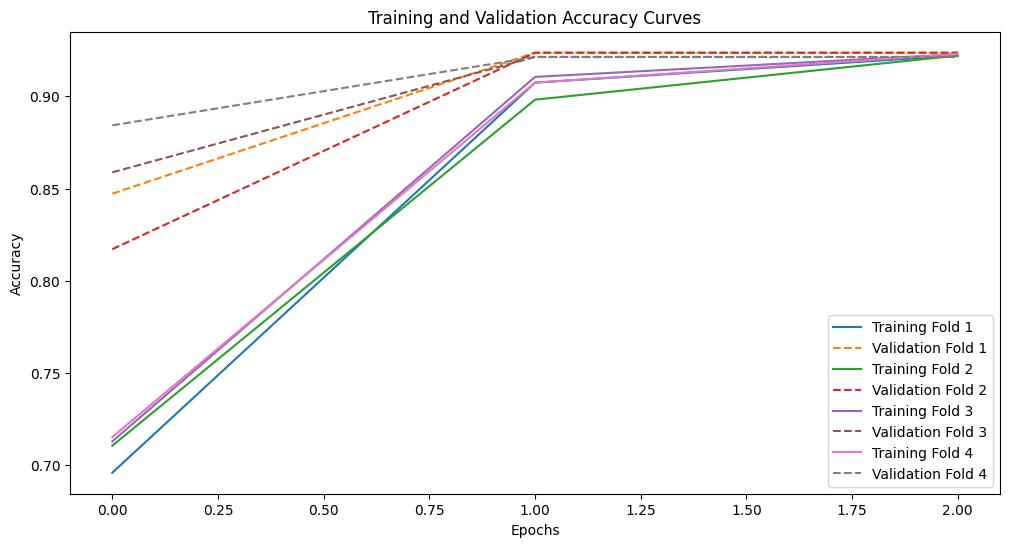

In [39]:

# Plot training and validation accuracy curves
plt.figure(figsize=(12, 6))
for fold in range(n_folds):
    plt.plot(hist.epoch, train_accuracies[fold], label=f'Training Fold {fold + 1}')
    plt.plot(hist.epoch, val_accuracies[fold], label=f'Validation Fold {fold + 1}', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()
plt.show()

In [40]:
model.optimizer.get_config()


{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.01,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

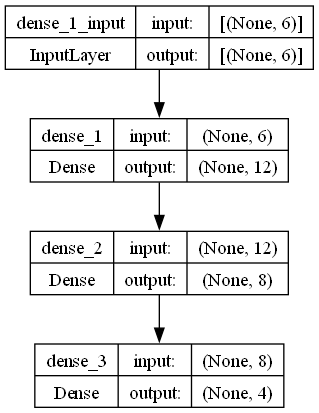

In [41]:
from tensorflow.keras.utils import plot_model

# Display the model architecture
plot_model(model, to_file=f'model_fold_{fold}.png', show_shapes=True, show_layer_names=True)


In [42]:
# Display the model summary
print("Model Summary:")
model.summary()

Model Summary:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 224 (896.00 Byte)
Trainable params: 224 (896.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
acc = hist.history['accuracy']
loss = hist.history['loss']

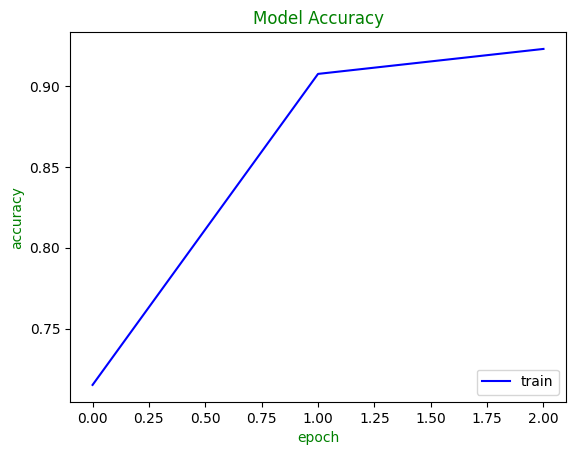

<Figure size 640x480 with 0 Axes>

In [44]:
from matplotlib import pyplot as plt
# plot training accuracy
plt.plot(acc, color='blue')
plt.title('Model Accuracy', color='green')
plt.ylabel('accuracy', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='lower right')
plt.show()
plt.savefig('accuracy_curve.png')

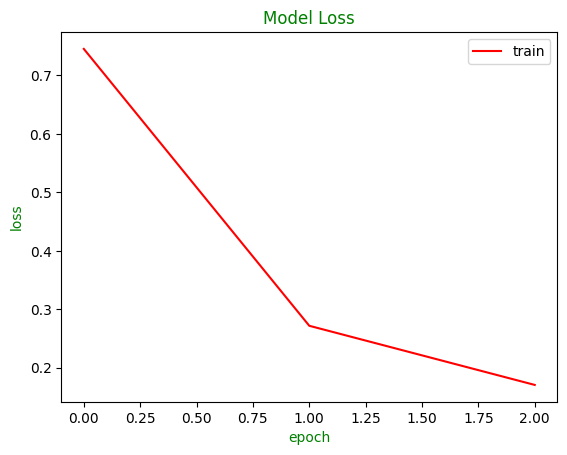

<Figure size 640x480 with 0 Axes>

In [45]:
# plot training loss
plt.plot(loss, color='red')
plt.title('Model Loss', color='green')
plt.ylabel('loss', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='upper right')
plt.show()
plt.savefig('loss_curve.png')

In [46]:
history_test = model.evaluate(X_test, a_y_test)
history_train = model.evaluate(X_train, y_train)
history_test


41/41 [==============================] - 0s 4ms/step - loss: 0.1470 - accuracy: 0.9244


[0.15235798060894012, 0.9212962985038757]

In [47]:

    # Evaluate the model on the test data
a_y_pred = (model.predict(X_test) > 0.5).astype(int)


14/14 [==============================] - 0s 3ms/step


In [48]:
# Calculate accuracy and store it
accuracy = accuracy_score(a_y_test, a_y_pred)
print(f'Accuracy: {accuracy}')
accuracy_scores.append(accuracy)


Accuracy: 0.9212962962962963


# **3. CNN**

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Assuming you have your dataset loaded into a DataFrame 'df' with features and labels

# Extract features and labels
X = df.drop('Safety', axis=1).values
y = df['class'].values

# One-hot encode the labels
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)

# Reshape X to be 3D for Conv1D input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, c_y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define your CNN model
model = Sequential(name='cnn_model')
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1), name='conv1d_1'))
model.add(MaxPooling1D(pool_size=2, name='maxpool1d_1'))
model.add(Flatten(name='flatten'))
model.add(Dense(128, activation='relu', name='dense_1'))
model.add(Dense(num_classes, activation='softmax', name='dense_output'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the model on the training data
c_hist= model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=2)


# Evaluate the model on the test data
c_y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate accuracy
c_accuracy = accuracy_score(np.argmax(c_y_test, axis=1), c_y_pred)
print(f'Accuracy: {c_accuracy}')

c_mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Accuracy: {c_mean_accuracy}')


Epoch 1/3
41/41 - 1s - loss: 0.6136 - accuracy: 0.7755 - 1s/epoch - 36ms/step
Epoch 2/3
41/41 - 0s - loss: 0.1107 - accuracy: 0.9606 - 171ms/epoch - 4ms/step
Epoch 3/3
41/41 - 0s - loss: 0.0575 - accuracy: 0.9799 - 165ms/epoch - 4ms/step
14/14 [==============================] - 0s 4ms/step
Accuracy: 0.9976851851851852
Mean Accuracy: 0.9222222222222222


In [50]:
c_acc_percentage = c_mean_accuracy * 100
print(f'Accuracy Percentage: {c_acc_percentage}%')


Accuracy Percentage: 92.22222222222221%


**Classification Report and Confusion Matrix of CNN**

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       103
           2       0.95      1.00      0.98        20
           3       1.00      0.93      0.97        15

    accuracy                           1.00       432
   macro avg       0.99      0.98      0.99       432
weighted avg       1.00      1.00      1.00       432

Confusion Matrix:
[[294   0   0   0]
 [  0 103   0   0]
 [  0   0  20   0]
 [  0   0   1  14]]


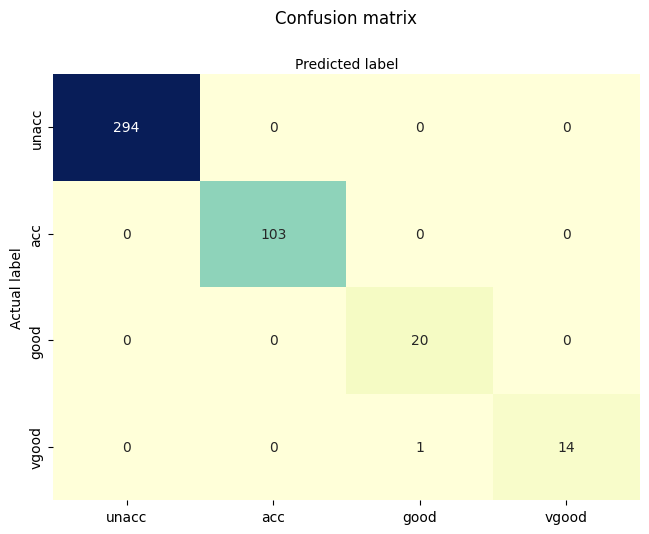

In [51]:
# Initialize lists to store true labels and predicted labels for each fold
true_labels = []
predicted_labels = []    
# Store true and predicted labels for later use
true_labels.extend(np.argmax(c_y_test, axis=1))
predicted_labels.extend(c_y_pred)


# Generate and print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Generate and print confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(conf_matrix)

# Plot confusion matrix as a heatmap
labels = ['unacc', 'acc', 'good', 'vgood']
confusion_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Create heatmap
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix_df, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()




# **Accuracy Comparision**

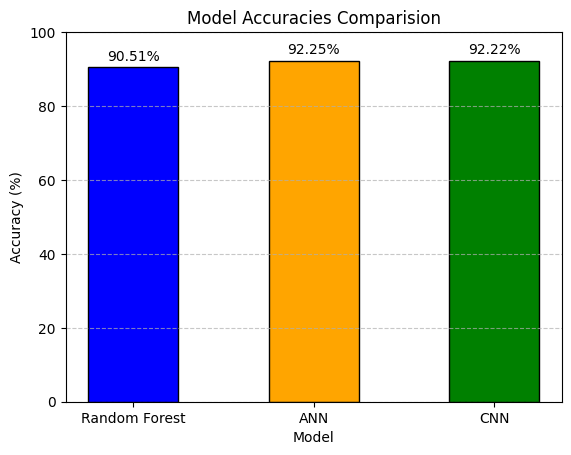

In [52]:
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'ANN', 'CNN']  # Add or modify names as needed

# Accuracies
accuracies = [acc_percentage, a_acc_percentage, c_acc_percentage]  # Replace with the actual accuracies

# Additional features
colors = ['blue', 'orange', 'green']  # Choose colors for each bar
bar_width = 0.5  # Adjust the width of the bars
bar_positions = range(len(models))  # Set positions for bars on the x-axis

# Create the bar chart
plt.bar(bar_positions, accuracies, width=bar_width, color=colors, edgecolor='black')

# Customize plot
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies Comparision')
plt.xticks(bar_positions, models)  # Set model names on the x-axis
plt.ylim(0, 100)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()
